In [1]:
import pysal as ps
import libpysal
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from tobler.area_weighted import area_join, area_interpolate
from pysal.explore import esda
import contextily
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from esda.moran import Moran
from sklearn.cluster import KMeans
from sklearn.preprocessing import robust_scale, minmax_scale
from sklearn.neighbors import NearestNeighbors


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/Safia/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/spaghetti/network.py:36: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [3]:
# Load regression gds 
selected = gpd.read_file('../YouthInTheCity/data/cluster_gdf.shp')
selected.set_index(['PLR_ID'], inplace=True)

In [4]:
selected = selected.drop(columns=['B_age','BZR_NAME'])

In [5]:
selected.columns

Index(['public_tra', 'eating', 'culture', 'community', 'health_car',
       'public_ser', 'education', 'universiti', 'outdoor_fa', 'outdoor_le',
       'night_life', 'water', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'mig_rate',
       'HK_EU15', 'HK_EU28', 'HK_Polen', 'HK_EheJug', 'HK_EheSU', 'HK_Turk',
       'HK_Arab', 'HK_Sonst', 'HK_NZOrd', 'ave_rent', 'dyn_wel_po', 'welf_po',
       'social_hou', 'public_hou', 'dyn_ew', 'five_y_pls', 'rent_to_pr',
       'dyn_r_to_p', 'sales', 'dyn_sales', 'unemployme', 'welfare',
       'child_pov', 'dyn_unempl', 'dyn_welfar', 'dyn_child', 'noise', 'air',
       'green', 'bio', 'total_buil', 'B_1940', 'B_1941_199', 'B_1991_201',
       'vegpm20', 'ch_rate', 'other_sch', 'vocat_sch', 'primary_sc',
       'Gymnasium', 'secon_sch', 'priv_schoo', 'sp_nee_sch', 'kita',
       'stations', 'geometry'],
      dtype='object')

In [6]:
selected = pd.DataFrame(minmax_scale(selected), columns=['public_tra', 'eating', 'culture', 'community', 'health_car',
       'public_ser', 'education', 'universiti', 'outdoor_fa', 'outdoor_le',
       'night_life', 'water', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'mig_rate',
       'HK_EU15', 'HK_EU28', 'HK_Polen', 'HK_EheJug', 'HK_EheSU', 'HK_Turk',
       'HK_Arab', 'HK_Sonst', 'HK_NZOrd', 'ave_rent', 'dyn_wel_po', 'welf_po',
       'social_hou', 'public_hou', 'dyn_ew', 'five_y_pls', 'rent_to_pr',
       'dyn_r_to_p', 'sales', 'dyn_sales', 'unemployme', 'welfare',
       'child_pov', 'dyn_unempl', 'dyn_welfar', 'dyn_child', 'noise', 'air',
       'green', 'bio', 'total_buil', 'B_1940', 'B_1941_199', 'B_1991_201',
       'vegpm20', 'ch_rate', 'other_sch', 'vocat_sch', 'primary_sc',
       'Gymnasium', 'secon_sch', 'priv_schoo', 'sp_nee_sch', 'kita',
       'stations'])

TypeError: float() argument must be a string or a number, not 'Polygon'

In [ ]:
selected

In [48]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 67 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   public_tra  536 non-null    float64
 1   eating      536 non-null    float64
 2   culture     536 non-null    float64
 3   community   536 non-null    float64
 4   health_car  536 non-null    float64
 5   public_ser  536 non-null    float64
 6   education   536 non-null    float64
 7   universiti  536 non-null    float64
 8   outdoor_fa  536 non-null    float64
 9   outdoor_le  536 non-null    float64
 10  night_life  536 non-null    float64
 11  water       536 non-null    float64
 12  E_EU1       536 non-null    float64
 13  E_E1U6      536 non-null    float64
 14  E_E6U15     536 non-null    float64
 15  E_E15U18    536 non-null    float64
 16  E_E18U25    536 non-null    float64
 17  E_E25U55    536 non-null    float64
 18  E_E55U65    536 non-null    float64
 19  E_E65U80    536 non-null    f

In [79]:
selected.drop(columns=['E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
            'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'mig_rate',
            'HK_EU15', 'HK_EU28', 'HK_Polen', 'HK_EheJug', 'HK_EheSU', 'HK_Turk',
            'HK_Arab', 'HK_Sonst', 'HK_NZOrd','BZR_NAME', 'total_buil','B_age', 'ch_rate',
            'sp_nee_sch','noise','green','night_life','culture','dyn_wel_po', 'welf_po',
            'dyn_ew','five_y_pls', 'unemployme', 'welfare',
           'dyn_unempl', 'dyn_welfar', 'dyn_child'], 
             inplace=True)

In [7]:
inv_dist = libpysal.weights.DistanceBand.from_dataframe(selected, 5000, geom_col='geometry', binary=False)

In [81]:
y_b = selected['child_pov']
X_b = selected.drop(columns=['child_pov','PLR_ID','geometry'])

In [82]:
### Perform permutation

#fit model
model = LinearRegression().fit(X_b,y_b)
#Perform permutation
permutation_score = permutation_importance(model, X_b,y_b, n_repeats=100)
#Unstack results, put in df
importance_df = pd.DataFrame(np.vstack((X_b.columns,permutation_score.importances_mean)).T)
importance_df.columns=['feature','feature importance']
#Order by importance
importance_df.sort_values(by='feature importance', ascending = False, inplace=True)
importance_df
#remove feature that have lower feature importance, run the validation score to test the reduced feature

feature feature importance
14  dyn_r_to_p           0.202878
2    community             0.1918
15       sales           0.130393
18         bio           0.102497
20  B_1941_199           0.102169
10    ave_rent           0.089691
16   dyn_sales           0.080369
11  social_hou           0.075253
4   public_ser           0.053803
21  B_1991_201           0.053778
1       eating           0.046385
5    education           0.042963
12  public_hou           0.035304
17         air           0.031288
30    stations           0.022004
8   outdoor_le           0.021153
13  rent_to_pr           0.018714
26   Gymnasium           0.018601
0   public_tra           0.014543
29        kita           0.007304
7   outdoor_fa           0.005057
22     vegpm20           0.002921
23   other_sch           0.000865
25  primary_sc             0.0008
28  priv_schoo           0.000515
24   vocat_sch           0.000475
6   universiti           0.000436
27   secon_sch           0.000247
9        water           0.000139
3   health_car           0.000063
19      B_1940           0.000034

In [83]:
selected.columns 

Index(['PLR_ID', 'public_tra', 'eating', 'community', 'health_car',
       'public_ser', 'education', 'universiti', 'outdoor_fa', 'outdoor_le',
       'water', 'ave_rent', 'social_hou', 'public_hou', 'rent_to_pr',
       'dyn_r_to_p', 'sales', 'dyn_sales', 'child_pov', 'air', 'bio', 'B_1940',
       'B_1941_199', 'B_1991_201', 'vegpm20', 'other_sch', 'vocat_sch',
       'primary_sc', 'Gymnasium', 'secon_sch', 'priv_schoo', 'kita',
       'stations', 'geometry'],
      dtype='object')

In [8]:
col = ['public_tra', 'eating', 'community', 'health_car',
       'public_ser', 'education', 'universiti', 'outdoor_fa', 'outdoor_le',
       'water', 'ave_rent', 'social_hou', 'public_hou', 'rent_to_pr',
       'dyn_r_to_p', 'sales', 'dyn_sales', 'child_pov', 'air', 'bio', 'B_1940',
       'B_1941_199', 'B_1991_201', 'vegpm20', 'other_sch', 'vocat_sch',
       'primary_sc', 'Gymnasium', 'secon_sch', 'priv_schoo', 'kita',
       'stations']

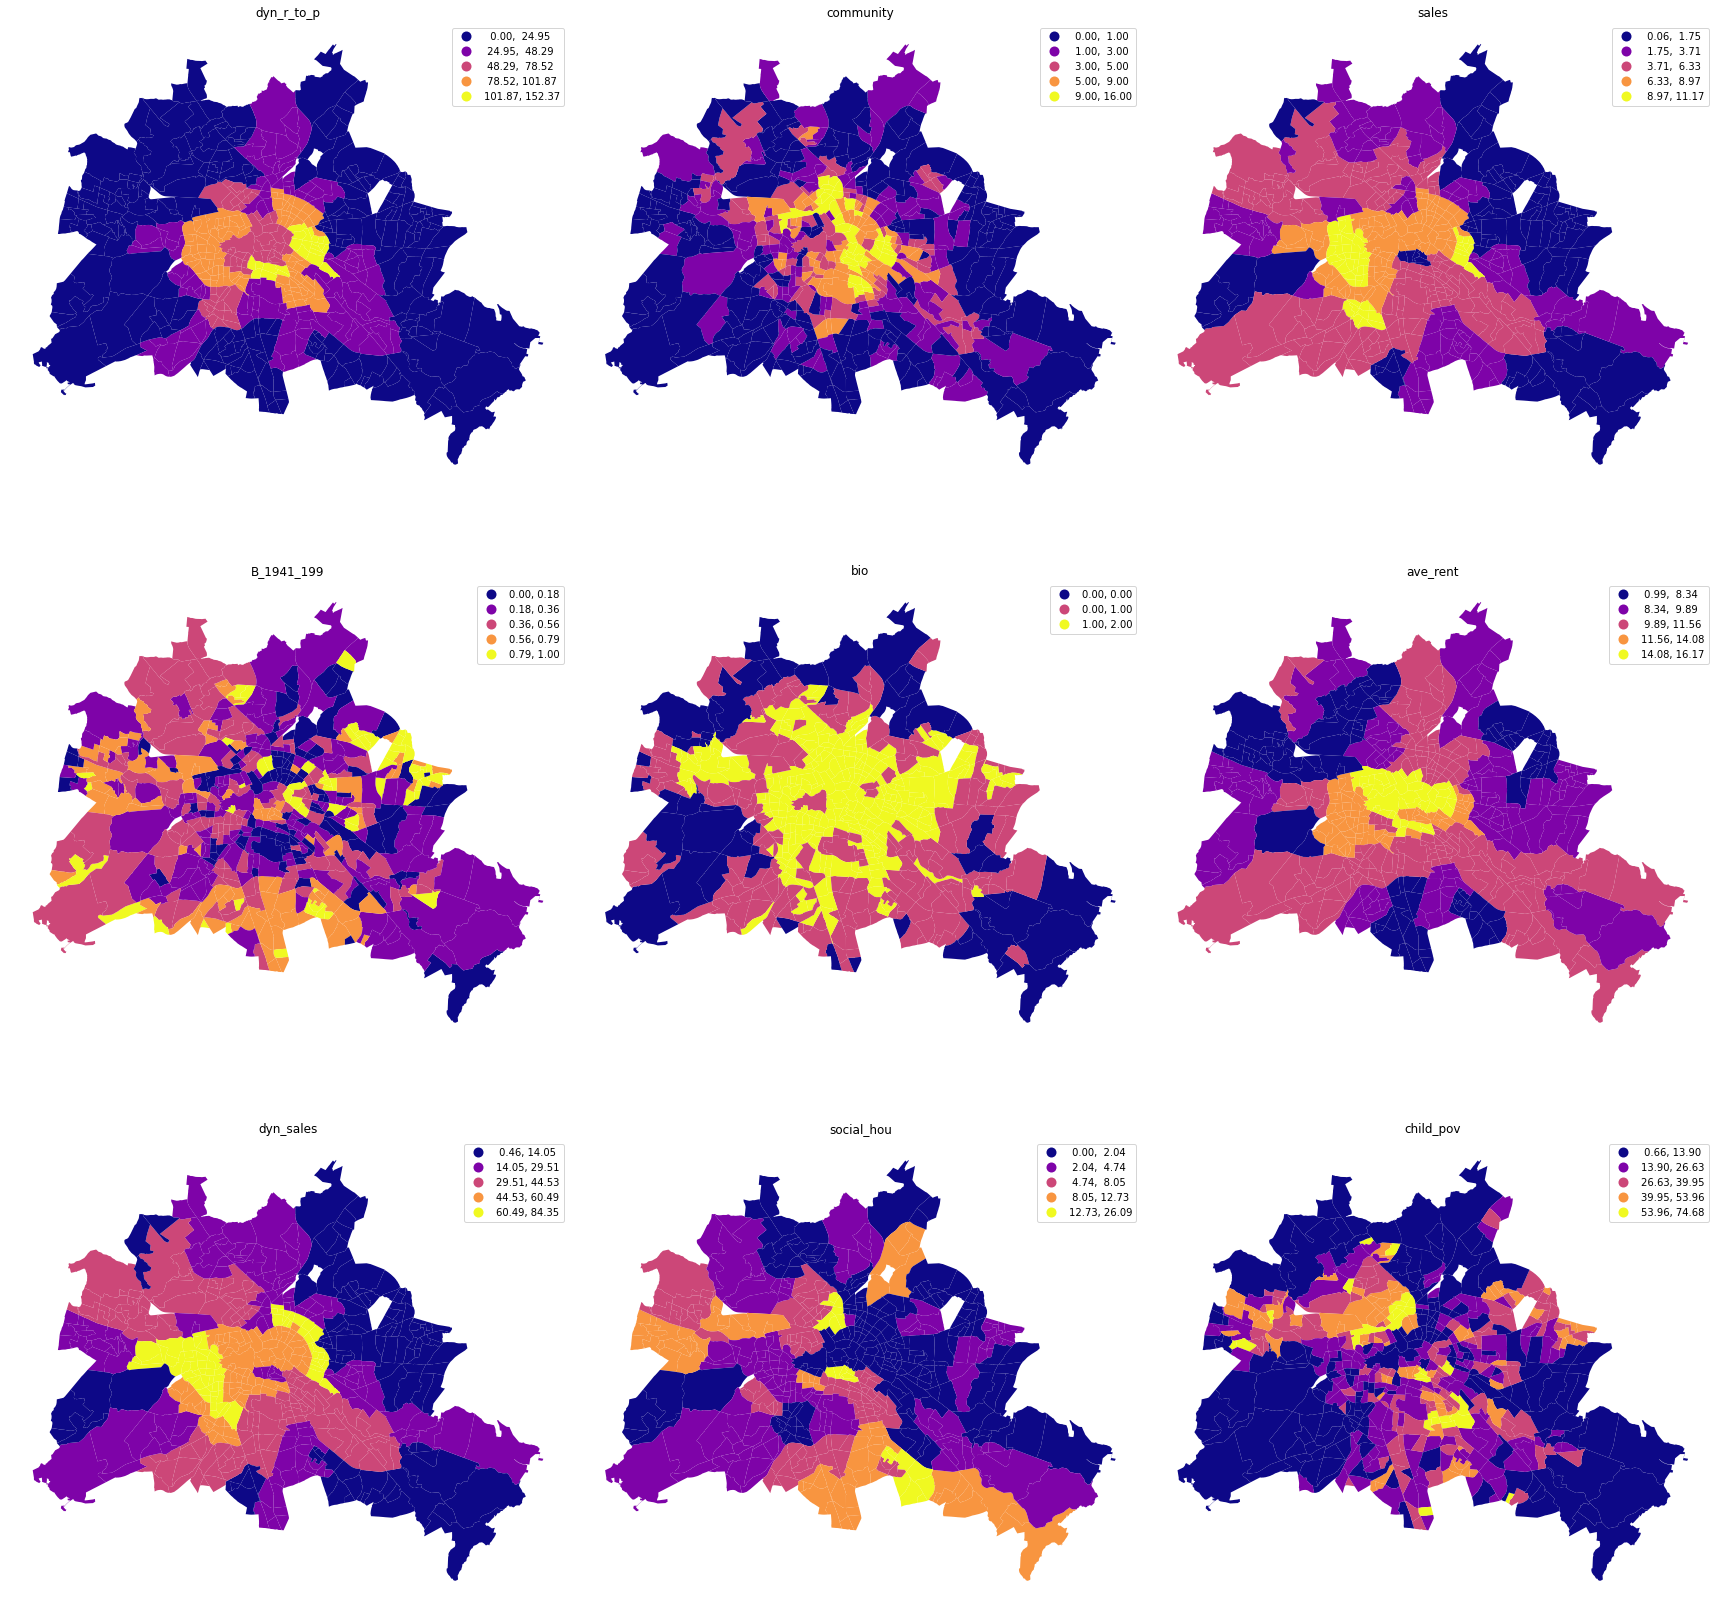

In [85]:
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(24, 24))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(iterable=clusters):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    selected.plot(
        column=col,
        ax=ax,
        scheme='natural_breaks',
        linewidth=0,
        cmap="plasma",
        legend=True
    )
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
f.tight_layout()
plt.show()

In [86]:
# Set seed for reproducibility
np.random.seed(123456)
# Calculate Moran's I for each variable
mi_results = [
    Moran(selected[variable], inv_dist) for variable in clusters
]
# Structure results as a list of tuples
mi_results = [
    (variable, res.I, res.p_sim)
    for variable, res in zip(clusters, mi_results)
]
# Display on table
table = pd.DataFrame(
    mi_results, columns=["Variable", "Moran's I", "P-value"]
).set_index("Variable")
table

Moran's I  P-value
Variable                      
dyn_r_to_p   0.653350    0.001
community    0.481454    0.001
sales        0.643220    0.001
B_1941_199   0.226659    0.001
bio          0.414672    0.001
ave_rent     0.600497    0.001
dyn_sales    0.616396    0.001
social_hou   0.328510    0.001
child_pov    0.287077    0.001

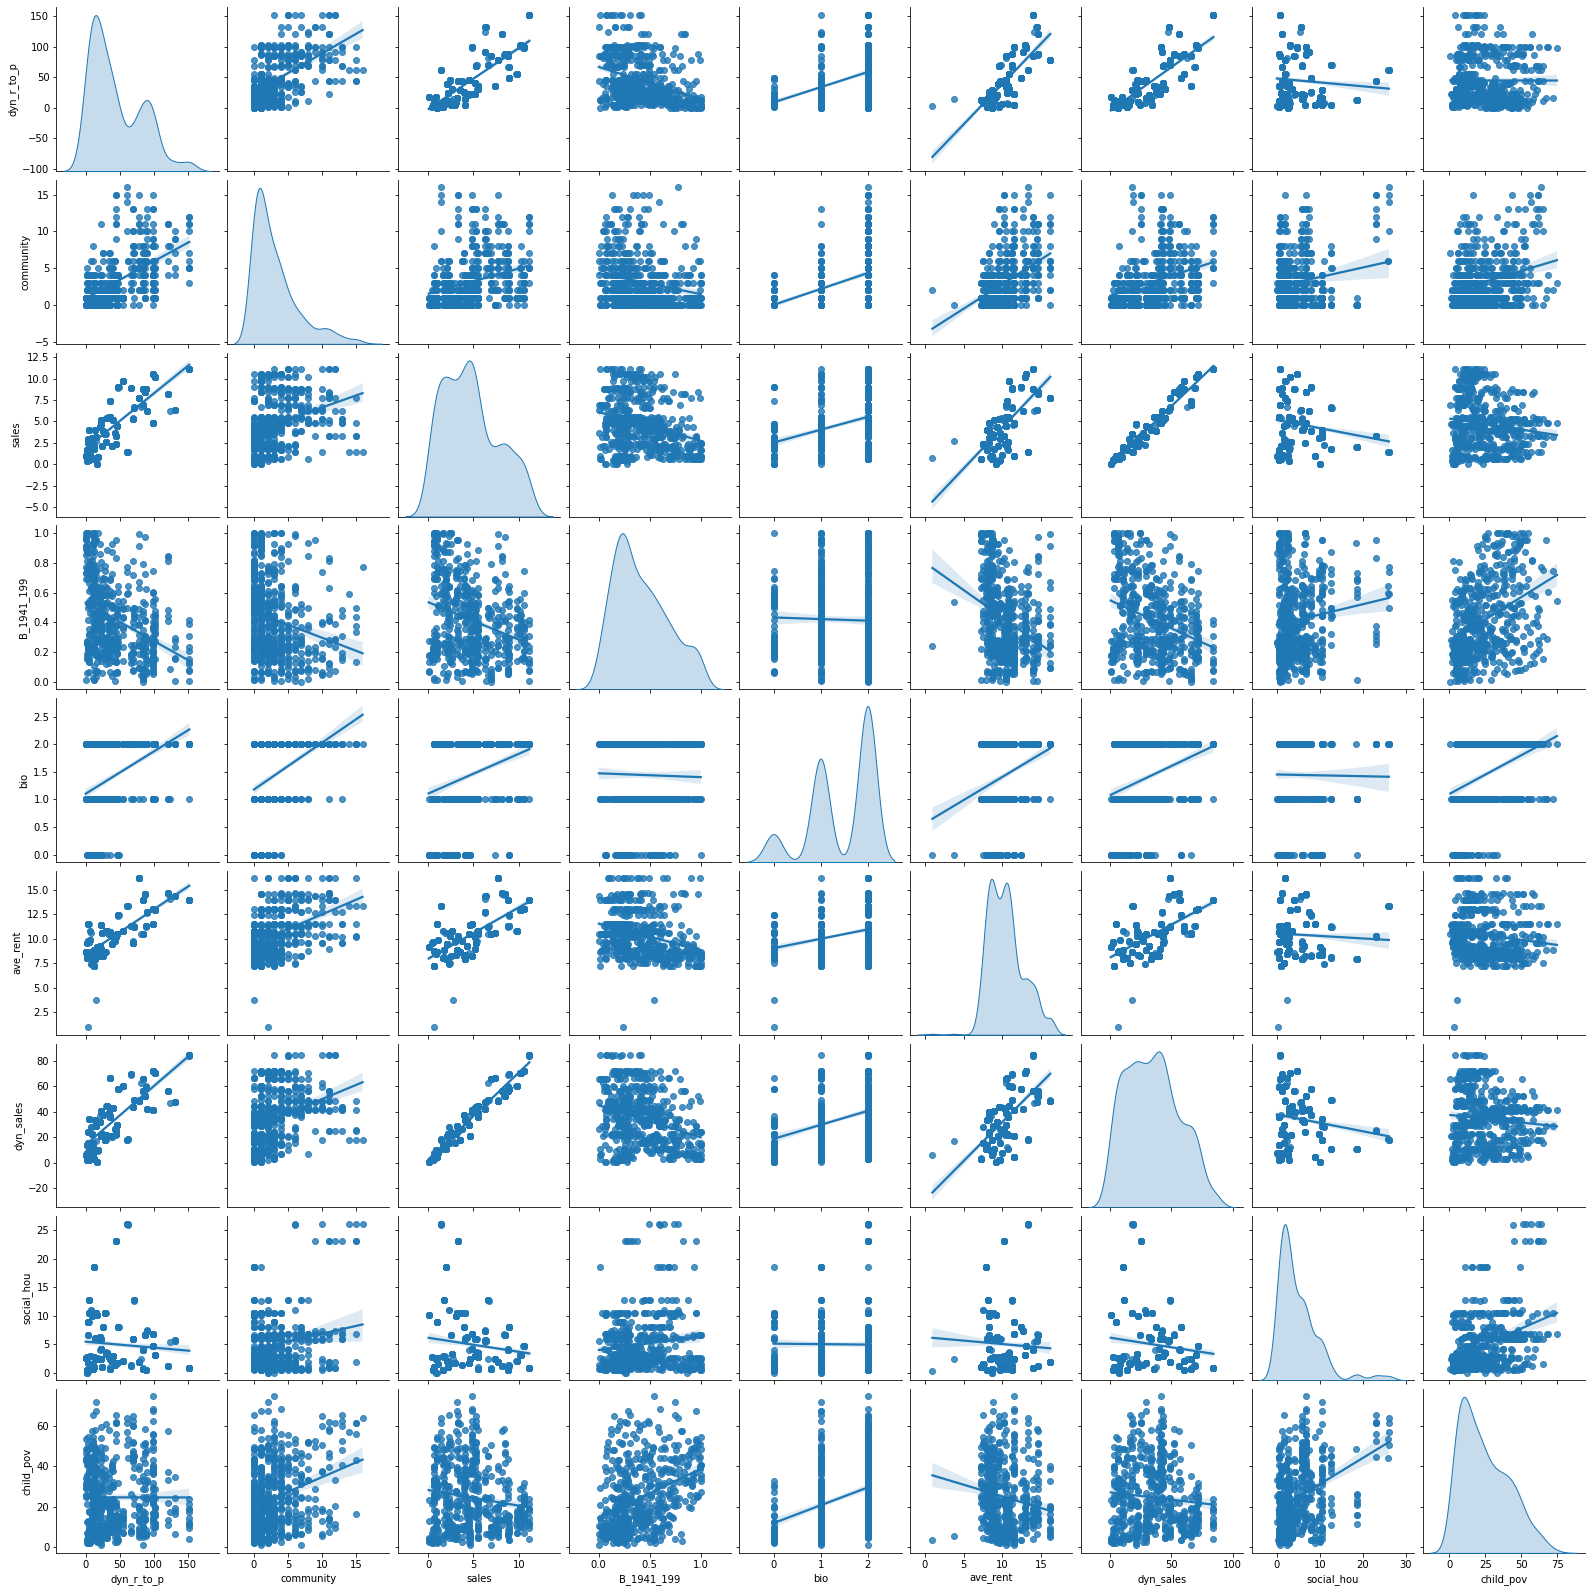

In [13]:
_ = seaborn.pairplot(
    selected[clusters], kind="reg", diag_kind="kde"
)

## Clusters with most important features in child poverty regression

In [87]:
clusters = list(np.append(importance_df.head(8).feature.values, ('child_pov')))

In [200]:
selected[clusters]

dyn_r_to_p  community      sales  bio  B_1941_199   ave_rent  dyn_sales  \
0     43.485219        2.0   3.712392  1.0    0.060269   9.750770  26.607421   
1     88.376721        8.0   8.809615  2.0    0.070704  11.261721  59.896169   
2      4.410000        0.0   1.730000  1.0    0.757727   8.100000  11.040000   
3    152.370000        6.0  11.170000  2.0    0.309616  13.970000  84.350000   
4     10.720000        6.0   2.330000  2.0    0.977334   7.550000  15.780000   
..          ...        ...        ...  ...         ...        ...        ...   
531   10.720000        1.0   2.330000  1.0    0.549494   7.550000  15.780000   
532   30.077286        0.0   2.590062  0.0    0.290537  10.759385  22.109248   
533    4.192183        1.0   0.540178  1.0    0.213530   9.710094   2.412211   
534   98.751285       13.0   4.850590  1.0    0.171995  11.521094  41.442492   
535   11.103771        1.0   0.670465  2.0    0.923866   8.731207   7.356245   

     social_hou  child_pov  
0      1.302637       2.58  
1      0.390507       8.13  
2     12.720000      41.68  
3      0.740000      21.15  
4      1.560000      51.53  
..          ...        ...  
531    1.560000      20.69  
532    3.209599       4.24  
533    0.550044       2.89  
534    6.729473      40.42  
535    0.594239      48.94  

[536 rows x 9 columns]

Text(0.5, 0, 'k cluster number')

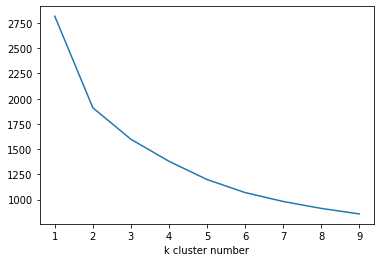

In [139]:
db_scaled = robust_scale(selected[clusters])

inertias = []
ks = range(1,10)

for k in ks:
    km_test = KMeans(n_clusters=k).fit(db_scaled)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')

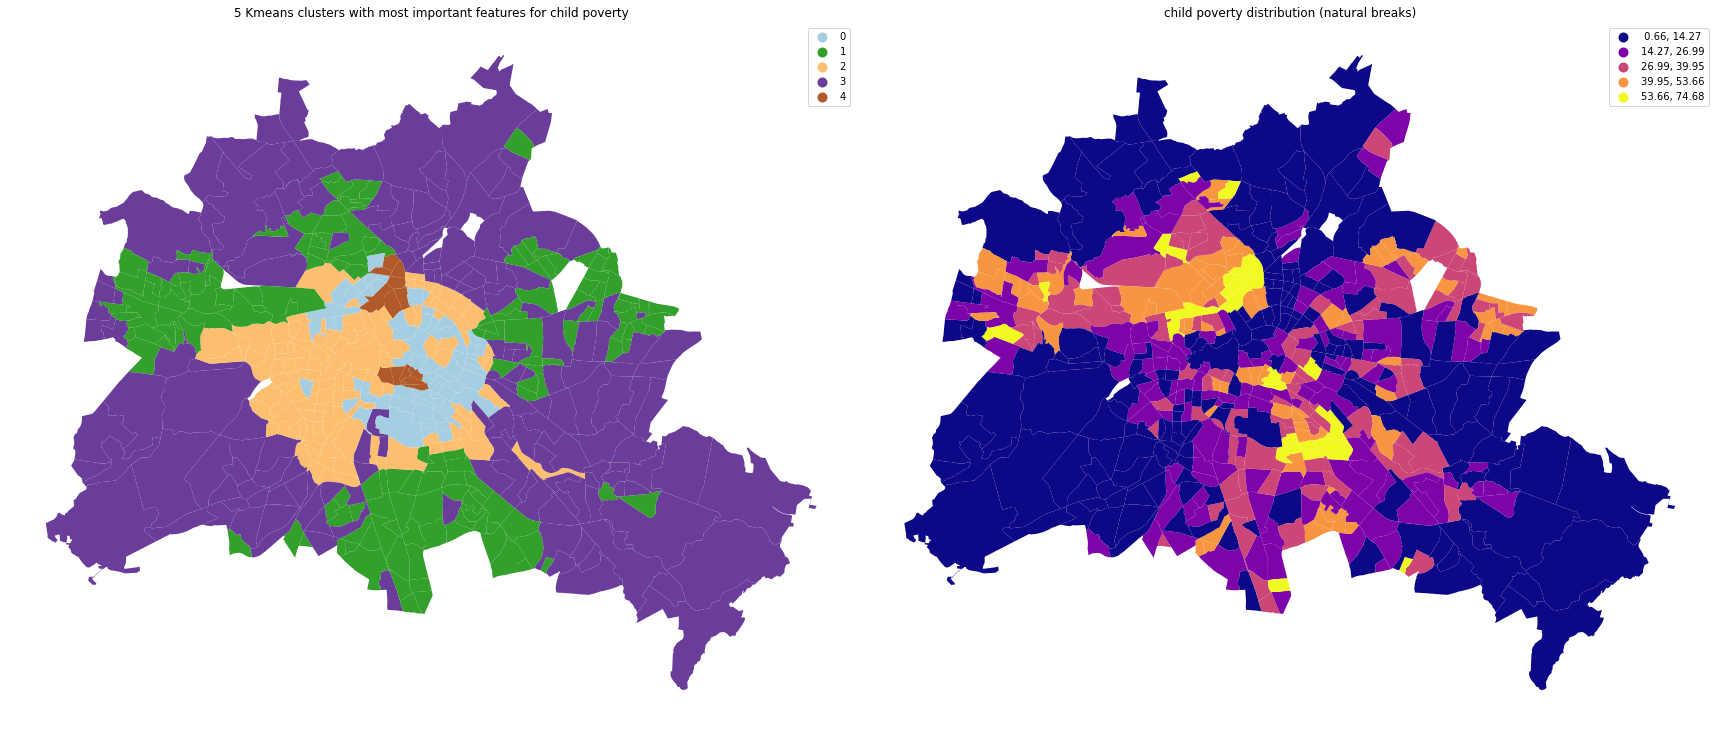

In [140]:
kmeans = KMeans(n_clusters=5)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(db_scaled)

selected["k5cls"] = k5cls.labels_

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 24))
# Make the axes accessible with single indexing
axs = axs.flatten()

ax = axs[0]
# Plot the map
selected.plot(
    column='k5cls',
    ax=ax,
    categorical=True,
    linewidth=0,
    cmap="Paired",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
ax.set_title('5 Kmeans clusters with most important features for child poverty')    
    
ax = axs[1]
# Plot the map
selected.plot(
    column='child_pov',
    ax=ax,
    scheme='natural_breaks',
    linewidth=0,
    cmap="plasma",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
ax.set_title('child poverty distribution (natural breaks)')
# Display the figure
f.tight_layout()
plt.show()


In [141]:
# Group table by cluster label, keep the variables used
# for clustering, and obtain their mean
k5means = selected.groupby("k5cls")[clusters].mean()
# Transpose the table and print it rounding each value
# to three decimals
k5means.T.round(3)

k5cls            0       1       2       3       4
dyn_r_to_p  94.487  14.724  82.622  23.142  51.982
community    9.369   1.622   3.191   1.421  11.769
sales        7.009   2.660   8.410   3.022   2.419
bio          1.908   1.532   1.740   0.924   2.000
B_1941_199   0.243   0.669   0.335   0.309   0.553
ave_rent    12.546   8.387  12.507   9.796  11.679
dyn_sales   51.700  20.715  60.198  22.393  22.065
social_hou   4.575   6.299   3.883   3.258  24.440
child_pov   28.990  35.812  21.859  12.191  56.489

In [142]:
# Group data table by cluster label and count observations
k5sizes = selected.groupby("k5cls").size()
k5sizes

k5cls
0     65
1    156
2    131
3    171
4     13
dtype: int64

In [143]:
np.corrcoef(selected["k5cls"], selected["child_pov"])

array([[ 1.        , -0.37555074],
       [-0.37555074,  1.        ]])

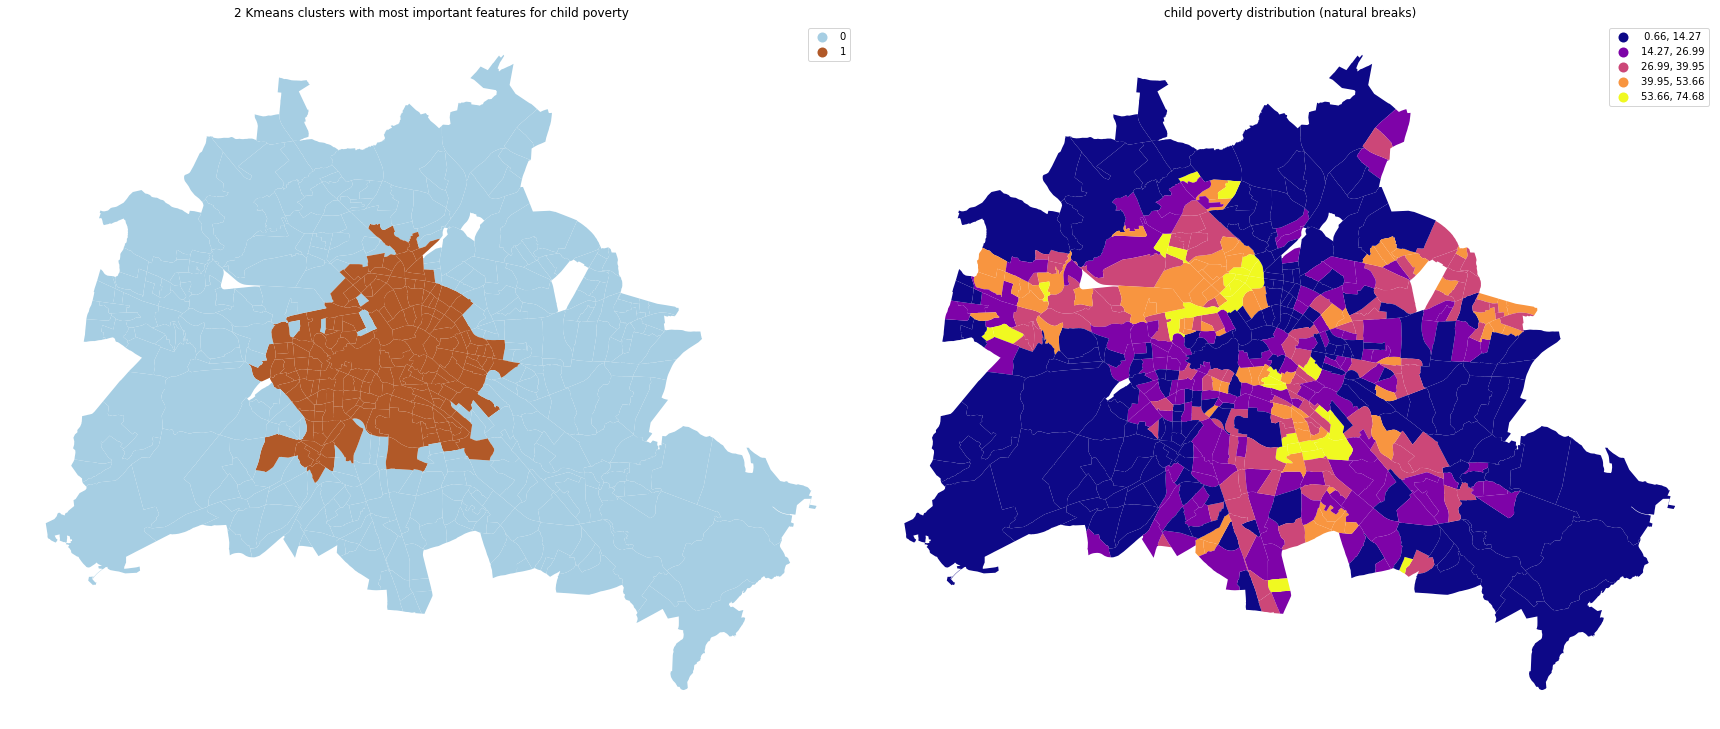

In [195]:
kmeans = KMeans(n_clusters=2)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(db_scaled)

selected["k5cls"] = k5cls.labels_

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 24))
# Make the axes accessible with single indexing
axs = axs.flatten()

ax = axs[0]
# Plot the map
selected.plot(
    column='k5cls',
    ax=ax,
    categorical=True,
    linewidth=0,
    cmap="Paired",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
ax.set_title('2 Kmeans clusters with most important features for child poverty')    
    
ax = axs[1]
# Plot the map
selected.plot(
    column='child_pov',
    ax=ax,
    scheme='natural_breaks',
    linewidth=0,
    cmap="plasma",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
ax.set_title('child poverty distribution (natural breaks)')
# Display the figure
f.tight_layout()
plt.show()


In [196]:
# Group table by cluster label, keep the variables used
# for clustering, and obtain their mean
k5means = selected.groupby("k5cls")[clusters].mean()
# Transpose the table and print it rounding each value
# to three decimals
k5means.T.round(3)

k5cls            0       1
dyn_r_to_p  22.797  85.571
community    1.551   6.091
sales        3.292   7.357
bio          1.214   1.882
B_1941_199   0.476   0.310
ave_rent     9.340  12.474
dyn_sales   24.795  53.312
social_hou   4.802   5.284
child_pov   23.959  25.636

In [148]:
# Group data table by cluster label and count observations
k5sizes = selected.groupby("k5cls").size()
k5sizes

k5cls
0    333
1    203
dtype: int64

In [149]:
np.corrcoef(selected["k5cls"], selected["child_pov"])

array([[1.        , 0.11475479],
       [0.11475479, 1.        ]])

"model = DBSCAN(eps=0.000005, min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(selected[clusters]))\ndbe_labels = model.labels_\ndb_labels = np.unique(model_labels[model_labels >= 0])\nnc_dbe,ns_dbe=plot1(G, ids_G3, dbe_labels,'dbscan_elbow_G.png')"

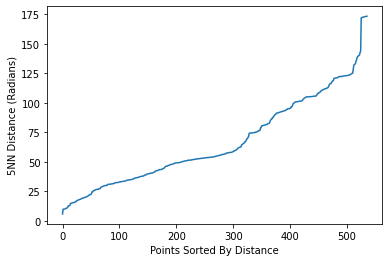

In [211]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(np.radians(selected[clusters]))
distances, indices = nbrs.kneighbors(selected[clusters])
distances = distances[:, 1]
distances = np.sort(distances, axis=0)
fig=plt.figure()
plt.plot(distances)
'''plt.xlim(15000, 19000)
plt.ylim(.000001, .00002)'''
plt.ylabel('5NN Distance (Radians)')
plt.xlabel('Points Sorted By Distance')
plt.savefig('dbscan_elbow',dpi=600)
'''model = DBSCAN(eps=0.000005, min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(selected[clusters]))
dbe_labels = model.labels_
db_labels = np.unique(model_labels[model_labels >= 0])
nc_dbe,ns_dbe=plot1(G, ids_G3, dbe_labels,'dbscan_elbow_G.png')'''




In [216]:
model = DBSCAN(eps=0.000005, min_samples=5, algorithm='ball_tree', metric='euclidean').fit(np.radians(selected[clusters]))
dbe_labels = model.labels_

In [218]:
db_labels = np.unique(dbe_labels[dbe_labels >= 0])
nc_dbe,ns_dbe=plot1(G, ids_G3, dbe_labels,'dbscan_elbow_G.png')

NameError: name 'plot1' is not defined

In [6]:
selected.columns

Index(['public_tra', 'eating', 'culture', 'community', 'health_car',
       'public_ser', 'education', 'universiti', 'outdoor_fa', 'outdoor_le',
       'night_life', 'water', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'mig_rate',
       'HK_EU15', 'HK_EU28', 'HK_Polen', 'HK_EheJug', 'HK_EheSU', 'HK_Turk',
       'HK_Arab', 'HK_Sonst', 'HK_NZOrd', 'ave_rent', 'dyn_wel_po', 'welf_po',
       'social_hou', 'public_hou', 'dyn_ew', 'five_y_pls', 'rent_to_pr',
       'dyn_r_to_p', 'sales', 'dyn_sales', 'unemployme', 'welfare',
       'child_pov', 'dyn_unempl', 'dyn_welfar', 'dyn_child', 'noise', 'air',
       'green', 'bio', 'total_buil', 'B_1940', 'B_1941_199', 'B_1991_201',
       'vegpm20', 'ch_rate', 'other_sch', 'vocat_sch', 'primary_sc',
       'Gymnasium', 'secon_sch', 'priv_schoo', 'sp_nee_sch', 'kita',
       'stations'],
      dtype='object')

In [21]:
col = ['child_pov',  'unemployme', 'welfare']

Text(0.5, 0, 'k cluster number')

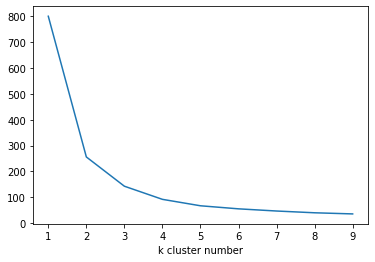

In [22]:
db_scaled = robust_scale(selected[col])

inertias = []
ks = range(1,10)

for k in ks:
    km_test = KMeans(n_clusters=k).fit(db_scaled)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [23]:
selected

public_tra  eating  culture  community  health_car  public_ser  \
PLR_ID                                                                     
11501341        55.0    24.0      2.0        2.0        16.0        16.0   
3701659         79.0   205.0     12.0        8.0        50.0        29.0   
7601340         61.0    13.0      1.0        0.0         8.0        12.0   
2500831         67.0   257.0      7.0        6.0        54.0        26.0   
12601134       154.0    17.0      0.0        6.0        11.0        16.0   
...              ...     ...      ...        ...         ...         ...   
12500927       211.0    29.0      0.0        1.0        18.0        23.0   
3200204         82.0     3.0      0.0        0.0         2.0         8.0   
10400941       111.0     9.0      1.0        1.0         6.0        18.0   
8100101        116.0   174.0     18.0       13.0        74.0        28.0   
11300616        53.0    14.0      0.0        1.0        16.0        17.0   

          education  universiti  outdoor_fa  outdoor_le  ...  other_sch  \
PLR_ID                                                   ...              
11501341        1.0         1.0       224.0         8.0  ...        0.0   
3701659         6.0         1.0       130.0        10.0  ...        0.0   
7601340         0.0         0.0         4.0         6.0  ...        0.0   
2500831         2.0         0.0       221.0        14.0  ...        0.0   
12601134        1.0         0.0        85.0        24.0  ...        0.0   
...             ...         ...         ...         ...  ...        ...   
12500927        0.0         0.0        61.0         9.0  ...        0.0   
3200204         0.0         0.0        75.0         8.0  ...        0.0   
10400941        0.0         0.0        45.0         4.0  ...        0.0   
8100101         2.0         2.0       342.0         1.0  ...        0.0   
11300616        0.0         0.0       156.0         2.0  ...        0.0   

          vocat_sch  primary_sc  Gymnasium  secon_sch  priv_schoo  sp_nee_sch  \
PLR_ID                                                                          
11501341        0.0         2.0        0.0        0.0         1.0         1.0   
3701659         0.0         4.0        1.0        2.0         8.0         2.0   
7601340         0.0         1.0        0.0        2.0         2.0         0.0   
2500831         0.0         4.0        2.0        0.0         1.0         0.0   
12601134        2.0         4.0        1.0        2.0         1.0         1.0   
...             ...         ...        ...        ...         ...         ...   
12500927        2.0         3.0        2.0        0.0         3.0         3.0   
3200204         0.0         1.0        0.0        0.0         1.0         0.0   
10400941        0.0         1.0        0.0        1.0         2.0         0.0   
8100101         0.0         4.0        1.0        2.0         3.0         0.0   
11300616        0.0         3.0        1.0        0.0         0.0         1.0   

          kita  stations                                           geometry  
PLR_ID                                                                       
11501341  20.0      10.0  POLYGON ((399848.954 5815619.506, 399854.727 5...  
3701659   47.0      13.0  POLYGON ((393175.012 5821135.577, 393167.174 5...  
7601340   17.0       0.0  POLYGON ((388394.110 5807792.070, 388379.276 5...  
2500831   41.0      13.0  POLYGON ((396010.552 5819339.570, 396021.567 5...  
12601134  24.0       2.0  POLYGON ((387367.428 5828619.763, 387315.862 5...  
...        ...       ...                                                ...  
12500927  27.0       4.0  POLYGON ((387280.650 5828614.114, 387266.882 5...  
3200204    7.0       2.0  POLYGON ((392586.179 5829994.574, 392586.626 5...  
10400941  12.0      12.0  POLYGON ((406064.851 5815581.891, 406061.455 5...  
8100101   47.0       3.0  POLYGON ((391887.140 5816592.598, 391898.686 5...  
11300616  11.0      13.0  POLYGON ((395625.330 5821110.

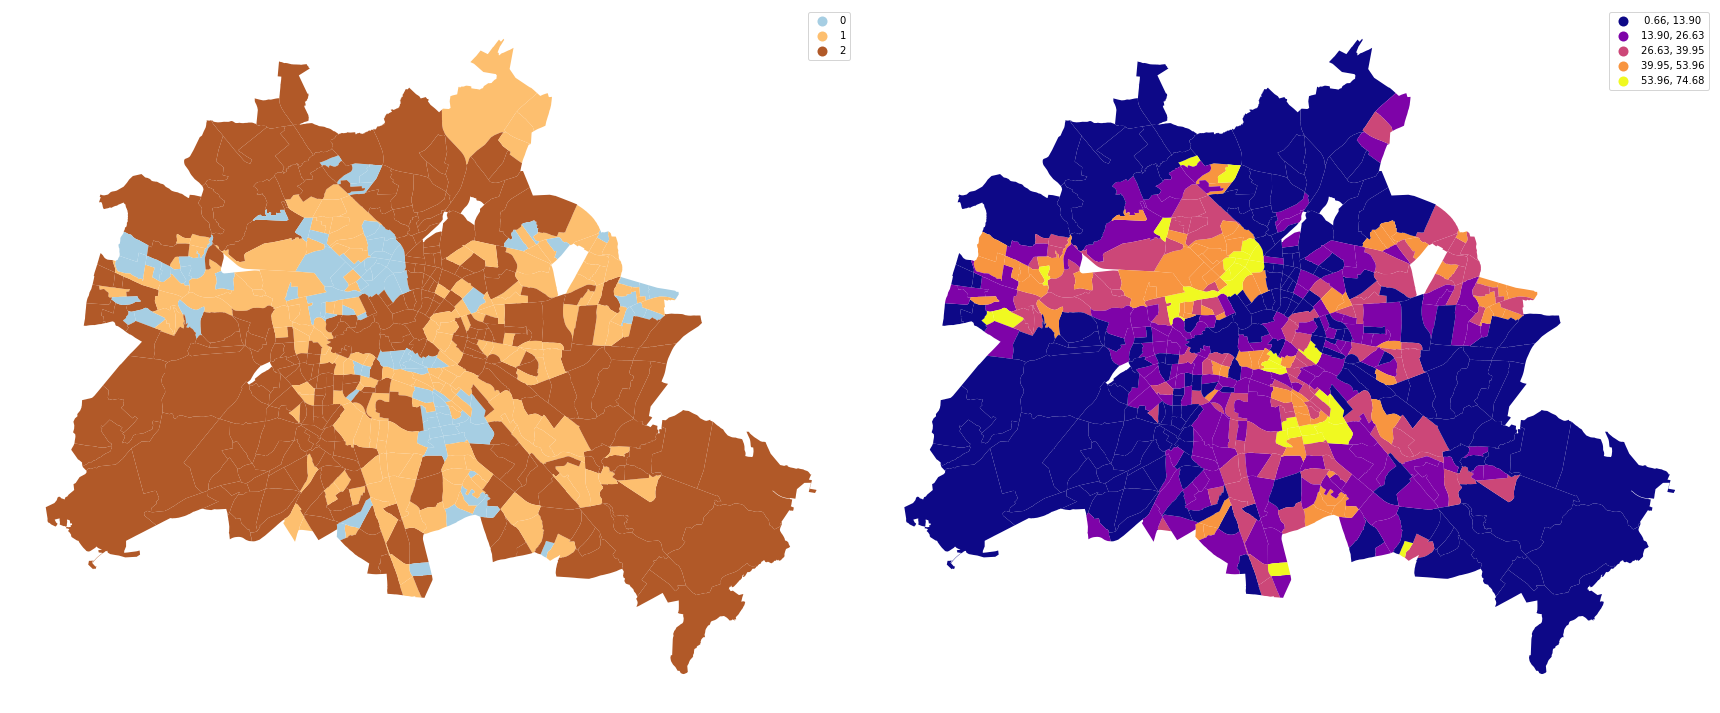

In [27]:
db_scaled = robust_scale(selected[col])

kmeans = KMeans(n_clusters=3)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(db_scaled)

selected["k5cls"] = k5cls.labels_

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 24))
# Make the axes accessible with single indexing
axs = axs.flatten()

ax = axs[0]
# Plot the map
selected.plot(
    column='k5cls',
    ax=ax,
    categorical=True,
    linewidth=0,
    cmap="Paired",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
#ax.set_title(col)    
    
ax = axs[1]
# Plot the map
selected.plot(
    column='child_pov',
    ax=ax,
    scheme='natural_breaks',
    linewidth=0,
    cmap="plasma",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
#ax.set_title(col)
# Display the figure
f.tight_layout()
plt.show()


In [28]:
# Group table by cluster label, keep the variables used
# for clustering, and obtain their mean
k5means = selected.groupby("k5cls")[col].mean()
# Transpose the table and print it rounding each value
# to three decimals
k5means.T.round(3)

k5cls            0       1       2
child_pov   51.651  30.862  10.859
unemployme   9.831   5.877   2.673
welfare     23.087  12.834   5.399

## Clusters with infrastructre features + child poverty

In [171]:
col = ['public_tra', 'eating', 'community', 'health_car',
       'public_ser', 'education', 'universiti', 'outdoor_fa', 'outdoor_le',
       'water', 'ave_rent', 'social_hou', 'public_hou', 'rent_to_pr',
       'dyn_r_to_p', 'sales', 'dyn_sales', 'child_pov', 'air', 'bio', 'B_1940',
       'B_1941_199', 'B_1991_201', 'vegpm20', 'other_sch', 'vocat_sch',
       'primary_sc', 'Gymnasium', 'secon_sch', 'priv_schoo', 'kita',
       'stations']

Text(0.5, 0, 'k cluster number')

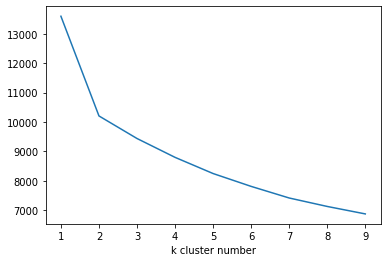

In [172]:
db_scaled = robust_scale(selected[col])

inertias = []
ks = range(1,10)

for k in ks:
    km_test = KMeans(n_clusters=k).fit(db_scaled)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')

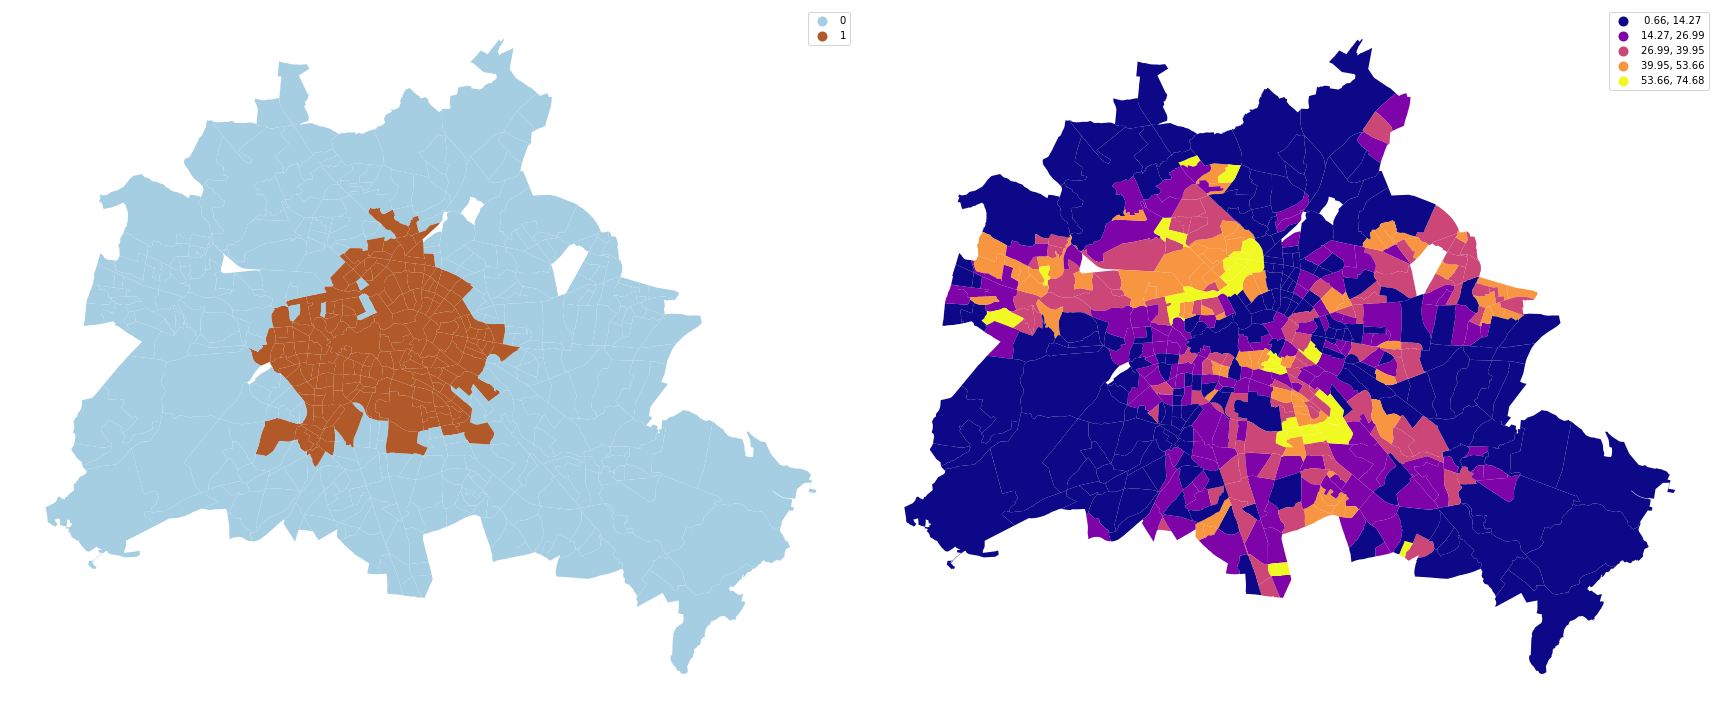

In [173]:
db_scaled = robust_scale(selected[col])

kmeans = KMeans(n_clusters=2)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(db_scaled)

selected["k5cls"] = k5cls.labels_

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 24))
# Make the axes accessible with single indexing
axs = axs.flatten()

ax = axs[0]
# Plot the map
selected.plot(
    column='k5cls',
    ax=ax,
    categorical=True,
    linewidth=0,
    cmap="Paired",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
#ax.set_title(col)    
    
ax = axs[1]
# Plot the map
selected.plot(
    column='child_pov',
    ax=ax,
    scheme='natural_breaks',
    linewidth=0,
    cmap="plasma",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
#ax.set_title(col)
# Display the figure
f.tight_layout()
plt.show()


In [174]:
# Group table by cluster label, keep the variables used
# for clustering, and obtain their mean
k5means = selected.groupby("k5cls")[clusters].mean()
# Transpose the table and print it rounding each value
# to three decimals
k5means.T.round(3)

k5cls            0       1
dyn_r_to_p  22.797  85.571
community    1.551   6.091
sales        3.292   7.357
bio          1.214   1.882
B_1941_199   0.476   0.310
ave_rent     9.340  12.474
dyn_sales   24.795  53.312
social_hou   4.802   5.284
child_pov   23.959  25.636

In [175]:
# Group data table by cluster label and count observations
k5sizes = selected.groupby("k5cls").size()
k5sizes

k5cls
0    350
1    186
dtype: int64

In [176]:
np.corrcoef(selected["k5cls"], selected["child_pov"])

array([[1.        , 0.04794031],
       [0.04794031, 1.        ]])

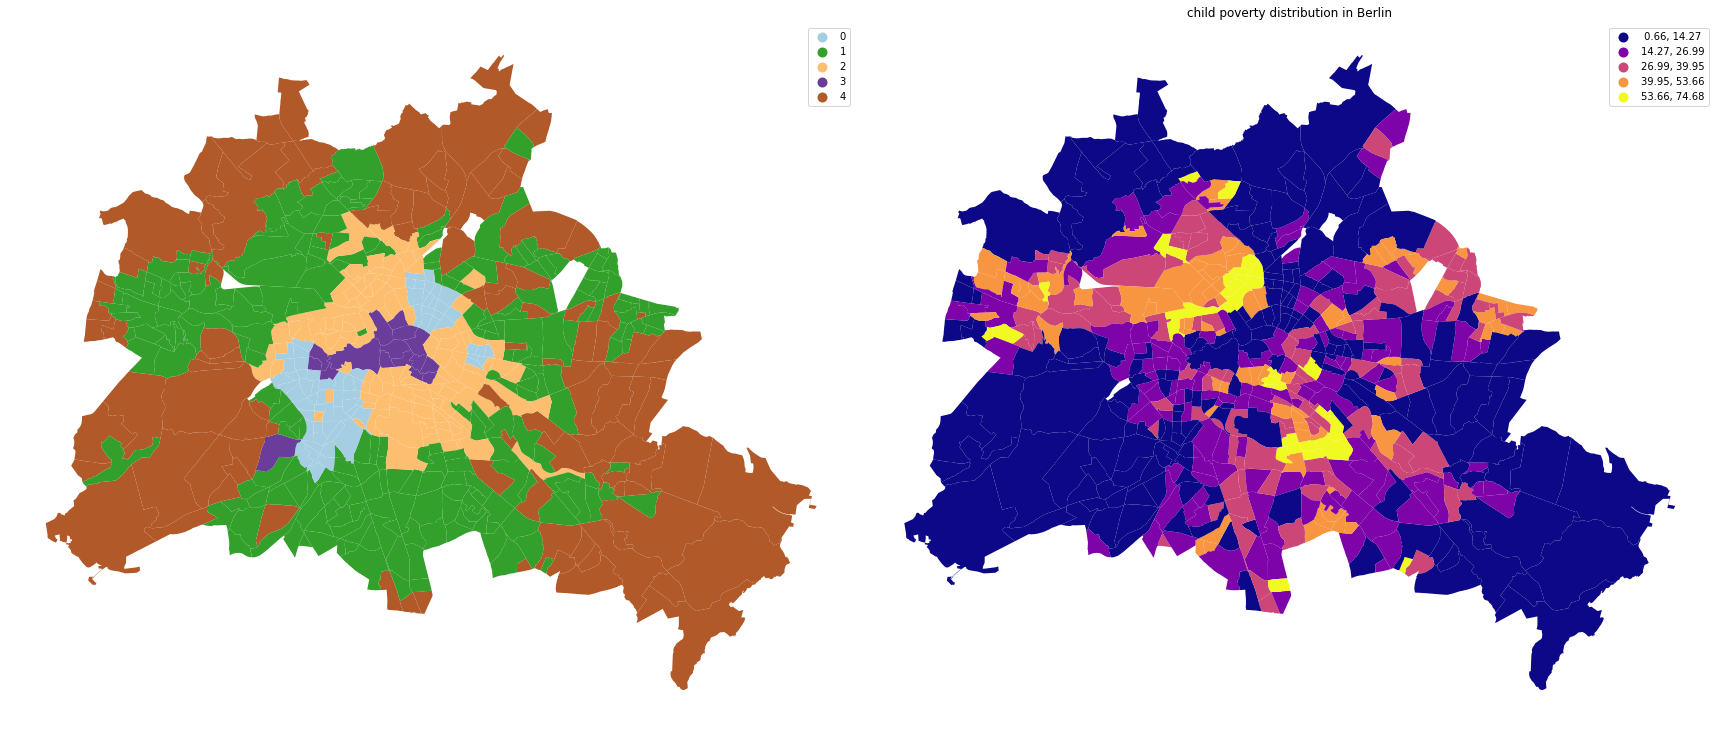

In [189]:
db_scaled = robust_scale(selected[col])

kmeans = KMeans(n_clusters=5)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(db_scaled)

selected["k5cls"] = k5cls.labels_

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 24))
# Make the axes accessible with single indexing
axs = axs.flatten()

ax = axs[0]
# Plot the map
selected.plot(
    column='k5cls',
    ax=ax,
    categorical=True,
    linewidth=0,
    cmap="Paired",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
#ax.set_title(col)    
    
ax = axs[1]
# Plot the map
selected.plot(
    column='child_pov',
    ax=ax,
    scheme='natural_breaks',
    linewidth=0,
    cmap="plasma",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
ax.set_title('child poverty distribution in Berlin')
# Display the figure
f.tight_layout()
plt.show()


In [191]:
# Group table by cluster label, keep the variables used
# for clustering, and obtain their mean
k5means = selected.groupby("k5cls")[col].mean()
# Transpose the table and print it rounding each value
# to three decimals
k5means.T.round(3)

k5cls             0        1        2        3       4
public_tra  106.044  100.797  122.726  220.250  95.009
eating      166.147   19.983  109.867  263.500  13.224
community     4.485    1.677    6.681    7.438   1.009
health_car   77.941   16.211   42.876   41.625   9.467
public_ser   30.191   15.819   25.832   35.562  14.935
education     4.147    0.216    1.301    1.312   0.150
universiti    1.412    0.349    0.832    5.375   0.234
outdoor_fa  157.221  118.366  249.097  406.750  99.944
outdoor_le    5.662    8.375    9.407    8.312   5.664
water         5.368    1.302    3.770   17.375   0.794
ave_rent     12.159    9.064   12.206   14.897   9.739
social_hou    2.932    5.284    6.707    4.294   3.848
public_hou    8.881   21.522   14.127   14.196  14.680
rent_to_pr   20.588    5.561   13.487   14.997   4.236
dyn_r_to_p   89.557   22.994   81.693   78.408  18.550
sales         9.053    3.476    6.155    7.562   2.636
dyn_sales    65.499   26.461   45.414   49.195  19.462
child_pov    14.991   29.954   33.084   19.721  10.569
air           1.574    0.987    1.407    1.625   0.449
bio           1.912    1.418    1.885    1.812   0.692
B_1940        0.686    0.326    0.596    0.432   0.307
B_1941_199    0.260    0.572    0.326    0.343   0.295
B_1991_201    0.054    0.102    0.078    0.225   0.398
vegpm20       2.641    3.202    2.869    2.545   5.274
other_sch     0.000    0.009    0.000    0.000   0.047
vocat_sch     0.441    0.267    0.735    0.688   0.112
primary_sc    3.765    2.491    3.805    3.062   1.757
Gymnasium     1.397    0.556    0.850    0.812   0.439
secon_sch     1.265    0.931    1.142    0.562   0.439
priv_schoo    2.456    1.073    2.381    4.312   1.056
kita         40.691   16.009   39.929   27.875  11.794
stations      7.750    4.151    6.991   15.188   5.607

In [179]:
# Group data table by cluster label and count observations
k5sizes = selected.groupby("k5cls").size()
k5sizes

k5cls
0     68
1    232
2    113
3     16
4    107
dtype: int64

In [180]:
np.corrcoef(selected["k5cls"], selected["child_pov"])

array([[ 1.        , -0.25966551],
       [-0.25966551,  1.        ]])

## Clusters with infrastructre features only

In [34]:
len(infra)

24

Text(0.5, 0, 'k cluster number')

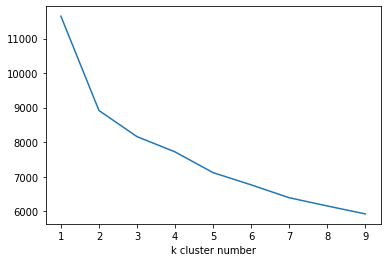

In [9]:
infra = ['public_tra', 'eating', 'community', 'health_car',
       'public_ser', 'education', 'universiti', 'outdoor_fa', 'outdoor_le',
       'water','social_hou', 'public_hou', 'B_1940',
       'B_1941_199', 'B_1991_201', 'vegpm20', 'other_sch', 'vocat_sch',
       'primary_sc', 'Gymnasium', 'secon_sch', 'priv_schoo', 'kita',
       'stations']

db_scaled = robust_scale(selected[infra])

inertias = []
ks = range(1,10)

for k in ks:
    km_test = KMeans(n_clusters=k).fit(db_scaled)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')

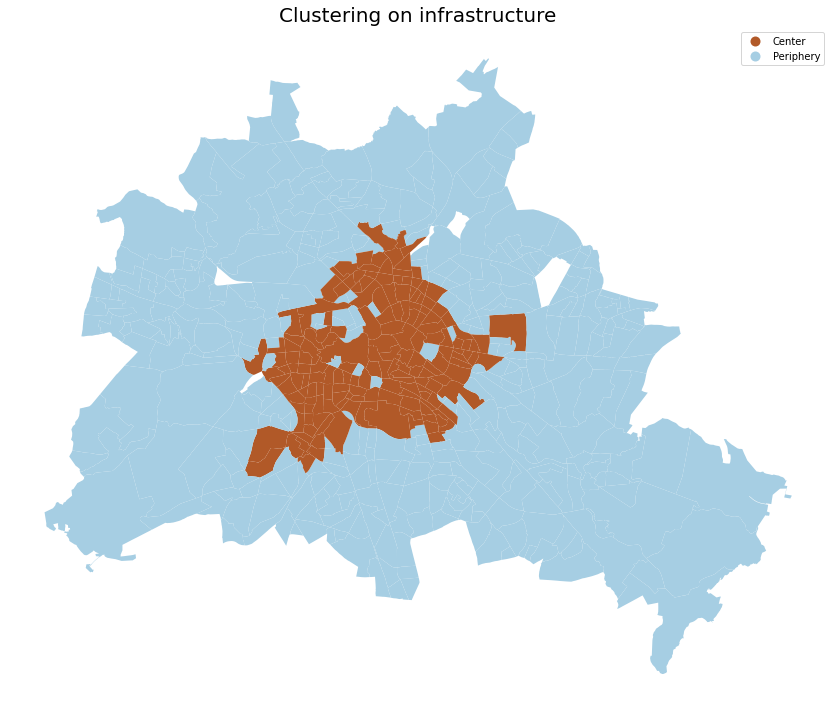

In [15]:
db_scaled = robust_scale(selected[infra])

kmeans = KMeans(n_clusters=2)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(db_scaled)

selected["k2cls"] = k5cls.labels_
selected['labels'] = selected["k2cls"].map({1:"Center",
                                            0:"Periphery",
                                           })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,10))
# Make the axes accessible with single indexing

# Plot the map
selected.plot(
    column='labels',
    ax=ax,
    categorical=True,
    linewidth=0,
    cmap="Paired_r",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
ax.set_title("Clustering on infrastructure", fontsize=20)

# Display the figure
f.tight_layout()
plt.savefig(fname='../cluster_infrastructure.png',facecolor='white')
plt.show()

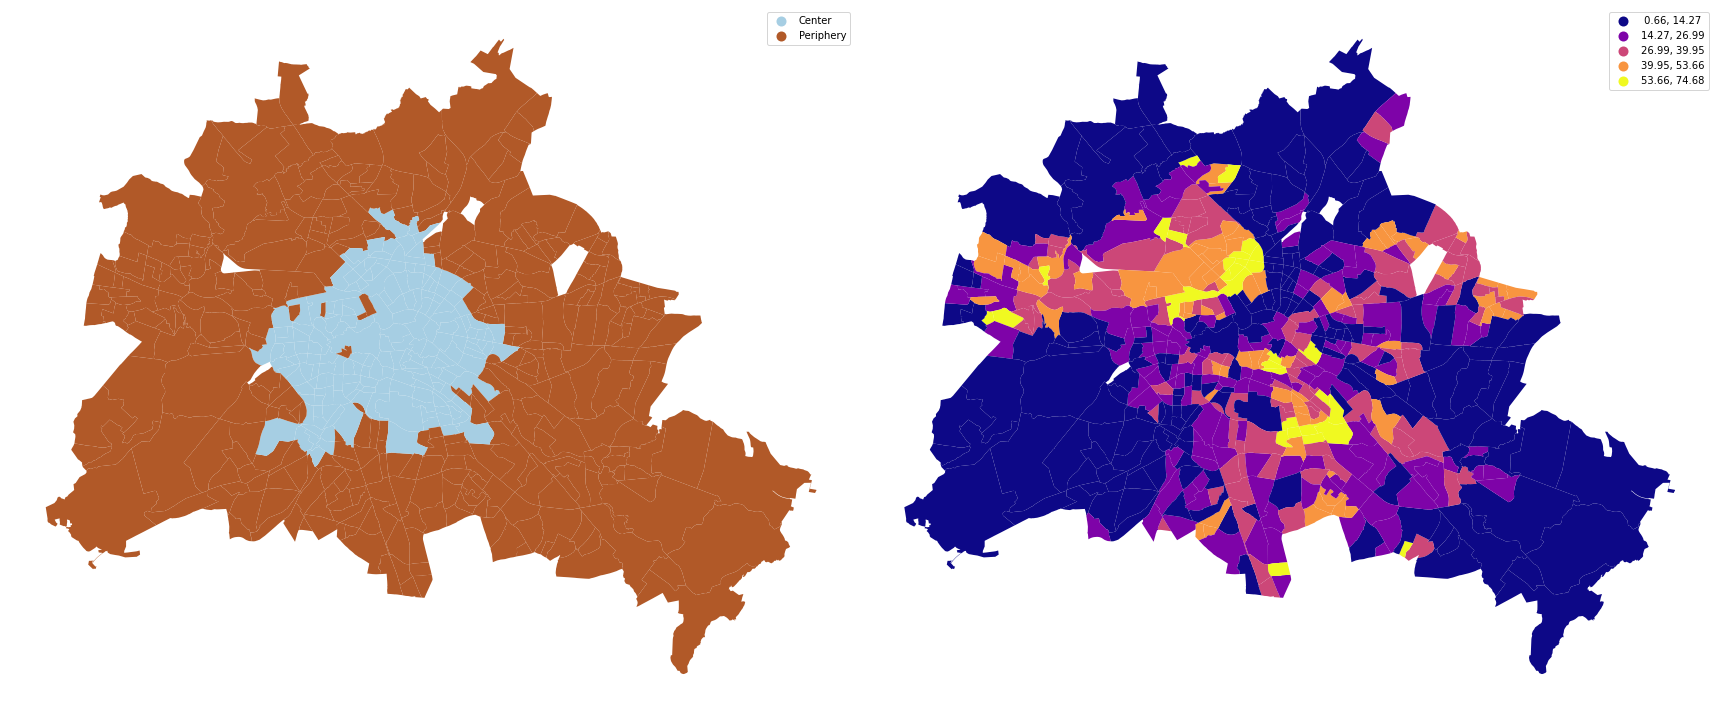

In [14]:
db_scaled = robust_scale(selected[infra])

kmeans = KMeans(n_clusters=2)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(db_scaled)

selected["k2cls"] = k5cls.labels_
selected['labels'] = selected["k2cls"].map({1:"Center",
                                            0:"Periphery",
                                           })

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 24))
# Make the axes accessible with single indexing
axs = axs.flatten()

ax = axs[0]
# Plot the map
selected.plot(
    column='labels',
    ax=ax,
    categorical=True,
    linewidth=0,
    cmap="Paired",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
#ax.set_title(col)    
    
ax = axs[1]
# Plot the map
selected.plot(
    column='child_pov',
    ax=ax,
    scheme='natural_breaks',
    linewidth=0,
    cmap="plasma",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
#ax.set_title(col)
# Display the figure
f.tight_layout()
plt.show()


In [126]:
selected.to_file('../raw_data/output_maps/2kgdf.shp')

In [32]:
# Group table by cluster label, keep the variables used
# for clustering, and obtain their mean
k5means = selected.groupby("k2cls")[infra].mean()
# Transpose the table and print it rounding each value
# to three decimals
k5means.T.round(3)

k2cls             0        1
public_tra  100.624  125.592
eating       21.736  153.864
community     1.662    6.308
health_car   15.270   59.059
public_ser   16.076   29.047
education     0.234    2.544
universiti    0.305    1.598
outdoor_fa  122.202  228.722
outdoor_le    7.605    7.923
water         1.322    5.746
social_hou    4.799    5.340
public_hou   18.810   12.355
B_1940        0.340    0.619
B_1941_199    0.472    0.301
B_1991_201    0.187    0.081
vegpm20       3.754    2.805
other_sch     0.019    0.000
vocat_sch     0.251    0.627
primary_sc    2.292    3.905
Gymnasium     0.520    1.118
secon_sch     0.777    1.195
priv_schoo    1.117    2.704
kita         15.801   40.840
stations      4.678    8.320

In [184]:
# Group data table by cluster label and count observations
k5sizes = selected.groupby("k5cls").size()
k5sizes

k5cls
0    350
1    186
dtype: int64

In [185]:
np.corrcoef(selected["k5cls"], selected["child_pov"])

array([[1.        , 0.04794031],
       [0.04794031, 1.        ]])

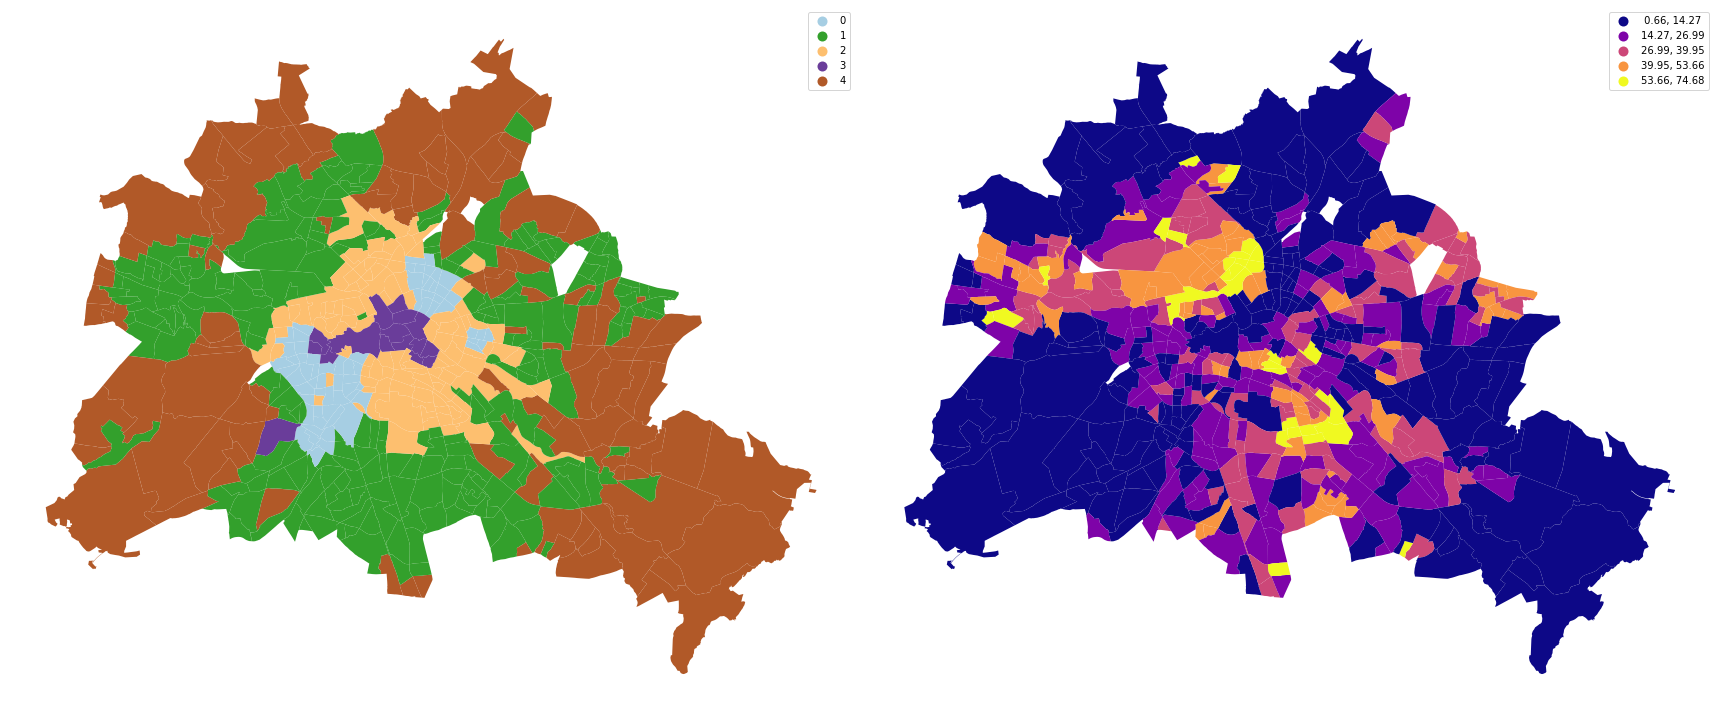

In [193]:


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(db_scaled)

selected["k5cls"] = k5cls.labels_

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 24))
# Make the axes accessible with single indexing
axs = axs.flatten()
selected["k5cls"] = k5cls.labels_

ax = axs[0]
# Plot the map
selected.plot(
    column='k5cls',
    ax=ax,
    categorical=True,
    linewidth=0,
    cmap="Paired",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
#ax.set_title(col)    
    
ax = axs[1]
# Plot the map
selected.plot(
    column='child_pov',
    ax=ax,
    scheme='natural_breaks',
    linewidth=0,
    cmap="plasma",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
#ax.set_title(col)
# Display the figure
f.tight_layout()
plt.show()


In [71]:
# Group table by cluster label, keep the variables used
# for clustering, and obtain their mean
k5means = selected.groupby("k5cls").mean()
# Transpose the table and print it rounding each value
# to three decimals
k5means.T.round(3)

k5cls                 0            1            2            3            4
PLR_ID      4752302.353  8059710.112  4111186.062  2181639.812  7695155.776
public_tra      106.044      100.797      122.726      220.250       95.009
eating          166.147       19.983      109.867      263.500       13.224
community         4.485        1.677        6.681        7.438        1.009
health_car       77.941       16.211       42.876       41.625        9.467
public_ser       30.191       15.819       25.832       35.562       14.935
education         4.147        0.216        1.301        1.312        0.150
universiti        1.412        0.349        0.832        5.375        0.234
outdoor_fa      157.221      118.366      249.097      406.750       99.944
outdoor_le        5.662        8.375        9.407        8.312        5.664
water             5.368        1.302        3.770       17.375        0.794
ave_rent         12.159        9.064       12.206       14.897        9.739
social_hou        2.932        5.284        6.707        4.294        3.848
public_hou        8.881       21.522       14.127       14.196       14.680
rent_to_pr       20.588        5.561       13.487       14.997        4.236
dyn_r_to_p       89.557       22.994       81.693       78.408       18.550
sales             9.053        3.476        6.155        7.562        2.636
dyn_sales        65.499       26.461       45.414       49.195       19.462
child_pov        14.991       29.954       33.084       19.721       10.569
air               1.574        0.987        1.407        1.625        0.449
bio               1.912        1.418        1.885        1.812        0.692
B_1940            0.686        0.326        0.596        0.432        0.307
B_1941_199        0.260        0.572        0.326        0.343        0.295
B_1991_201        0.054        0.102        0.078        0.225        0.398
vegpm20           2.641        3.202        2.869        2.545        5.274
other_sch         0.000        0.009        0.000        0.000        0.047
vocat_sch         0.441        0.267        0.735        0.688        0.112
primary_sc        3.765        2.491        3.805        3.062        1.757
Gymnasium         1.397        0.556        0.850        0.812        0.439
secon_sch         1.265        0.931        1.142        0.562        0.439
priv_schoo        2.456        1.073        2.381        4.312        1.056
kita             40.691       16.009       39.929       27.875       11.794
stations          7.750        4.151        6.991       15.188        5.607

In [68]:
# Group data table by cluster label and count observations
k5sizes = selected.groupby("k5cls").size()
k5sizes

k5cls
0     73
1     16
2    120
3     60
4    267
dtype: int64

In [69]:
np.corrcoef(selected["k5cls"], selected["child_pov"])

array([[1.        , 0.22372119],
       [0.22372119, 1.        ]])

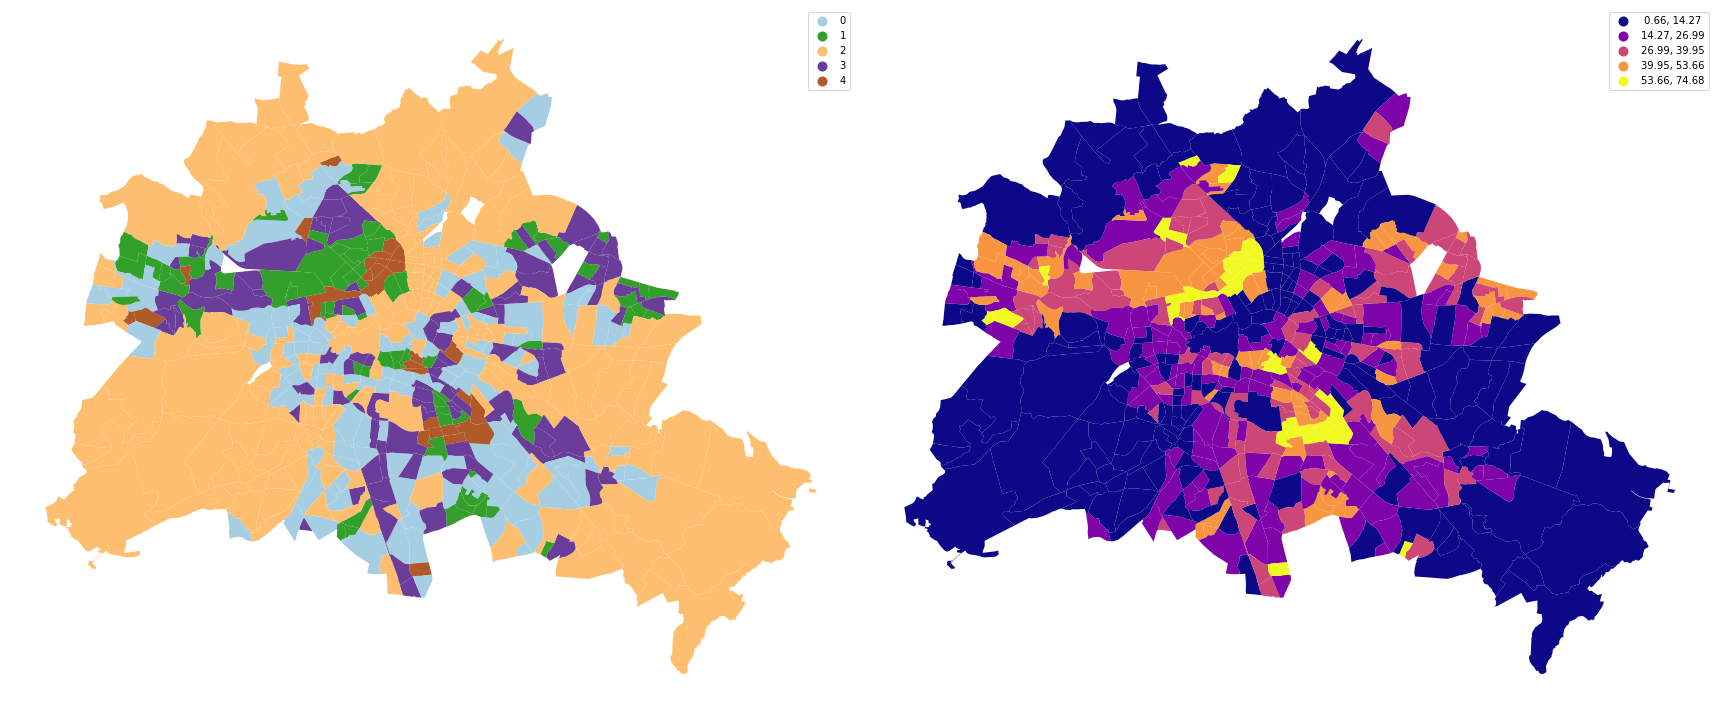

In [73]:


db_scaled = robust_scale(selected['child_pov'])

# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(db_scaled.reshape(-1, 1))

selected["k5cls"] = k5cls.labels_

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 24))
# Make the axes accessible with single indexing
axs = axs.flatten()
selected["k5cls"] = k5cls.labels_

ax = axs[0]
# Plot the map
selected.plot(
    column='k5cls',
    ax=ax,
    categorical=True,
    linewidth=0,
    cmap="Paired",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
#ax.set_title(col)    
    
ax = axs[1]
# Plot the map
selected.plot(
    column='child_pov',
    ax=ax,
    scheme='natural_breaks',
    linewidth=0,
    cmap="plasma",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
#ax.set_title(col)
# Display the figure
f.tight_layout()
plt.show()


In [74]:
# Group table by cluster label, keep the variables used
# for clustering, and obtain their mean
k5means = selected.groupby("k5cls").mean()
# Transpose the table and print it rounding each value
# to three decimals
k5means.T.round(3)

k5cls                 0            1            2            3            4
PLR_ID      6359949.681  6870302.395  6199225.577  7751050.515  4789895.786
public_tra      117.133       99.053      108.789      103.262      109.714
eating           74.067       47.829       68.433       49.262       71.286
community         2.793        3.776        2.433        3.204        7.500
health_car       29.622       26.605       31.799       24.544       30.964
public_ser       22.489       17.079       20.706       18.398       20.107
education         1.030        0.632        1.263        0.573        0.893
universiti        0.852        0.592        0.840        0.485        0.321
outdoor_fa      152.785      152.921      149.433      166.864      181.321
outdoor_le        8.356        6.987        6.680        9.262        7.893
water             3.126        2.092        2.861        2.262        3.107
ave_rent         10.714        9.586       10.833        9.864       10.601
social_hou        4.872        7.205        3.279        4.867       11.462
public_hou       15.844       22.429       12.395       21.774       17.869
rent_to_pr       11.170        6.271        9.720        7.782        8.416
dyn_r_to_p       52.154       35.465       43.930       38.890       58.243
sales             5.505        3.725        4.950        4.045        4.186
dyn_sales        39.620       29.147       35.804       30.528       33.560
child_pov        20.463       46.969        8.137       34.049       62.001
air               1.185        1.118        0.866        1.165        1.286
bio               1.459        1.724        1.175        1.650        1.750
B_1940            0.434        0.330        0.472        0.391        0.498
B_1941_199        0.430        0.596        0.289        0.507        0.446
B_1991_201        0.136        0.074        0.239        0.102        0.056
vegpm20           3.108        3.261        4.041        3.132        2.776
other_sch         0.015        0.000        0.021        0.010        0.000
vocat_sch         0.489        0.461        0.263        0.291        0.571
primary_sc        2.859        3.053        2.608        2.631        3.786
Gymnasium         0.748        0.553        0.814        0.621        0.536
secon_sch         0.978        1.026        0.742        1.068        0.821
priv_schoo        1.726        1.329        1.804        1.369        1.500
kita             24.015       24.118       22.881       21.505       34.714
stations          5.570        4.263        7.062        5.408        4.286

## Comparing child poverty distribution now and with 25% social housing 

In [249]:
d = gpd.read_file('/Users/Safia/code/Safiaaaaa/YouthInTheCity/raw_data/output_maps/merged_bez.shp')

In [250]:
selected['u15'] = d.E_EU1 + d.E_E1U6 + d.E_E6U15

In [269]:
selected['ch_pov_rate'] = selected.child_pov / selected.child_pov.sum() *1000

In [301]:
selected['rounds_ch_rate'] = round(selected['ch_pov_rate'])

<AxesSubplot:>

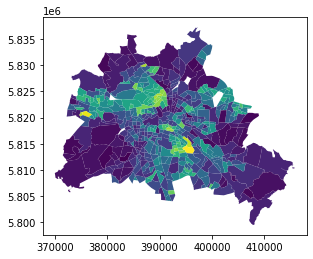

In [257]:

selected.plot(column='ch_pov_rate')

In [236]:
preds = pd.read_csv('../YouthInTheCity/data/data_predicted.csv')

In [237]:
preds['preds'] = preds.child_pov

In [259]:
preds.child_pov.mean()

27.24398542050735

In [235]:
selected.child_pov.mean()

24.540559701492537

In [302]:
s['rounds_preds_rate'] = round(s['preds_rate'])

In [298]:
round(s.preds_rate)

0      2.0
1      1.0
2      2.0
3      2.0
4      2.0
      ... 
531    1.0
532    1.0
533    1.0
534    3.0
535    2.0
Name: preds_rate, Length: 536, dtype: float64

In [270]:
s['preds_rate'] = s.preds / s.preds.sum()*1000

In [239]:
s = selected.merge(preds[['PLR_ID', 'preds']], on='PLR_ID')

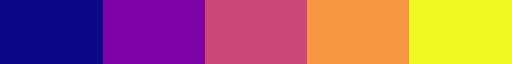

In [319]:
import matplotlib.cm as cm
cm.get_cmap('plasma', 5)

In [325]:
plasma=cm.get_cmap('plasma', 5)


In [326]:
plasma.colors

array([[0.050383, 0.029803, 0.527975, 1.      ],
       [0.494877, 0.01199 , 0.657865, 1.      ],
       [0.798216, 0.280197, 0.469538, 1.      ],
       [0.973416, 0.585761, 0.25154 , 1.      ],
       [0.940015, 0.975158, 0.131326, 1.      ]])

In [331]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

cmap = ListedColormap([plasma(0), plasma(1), plasma(2), plasma(3)])

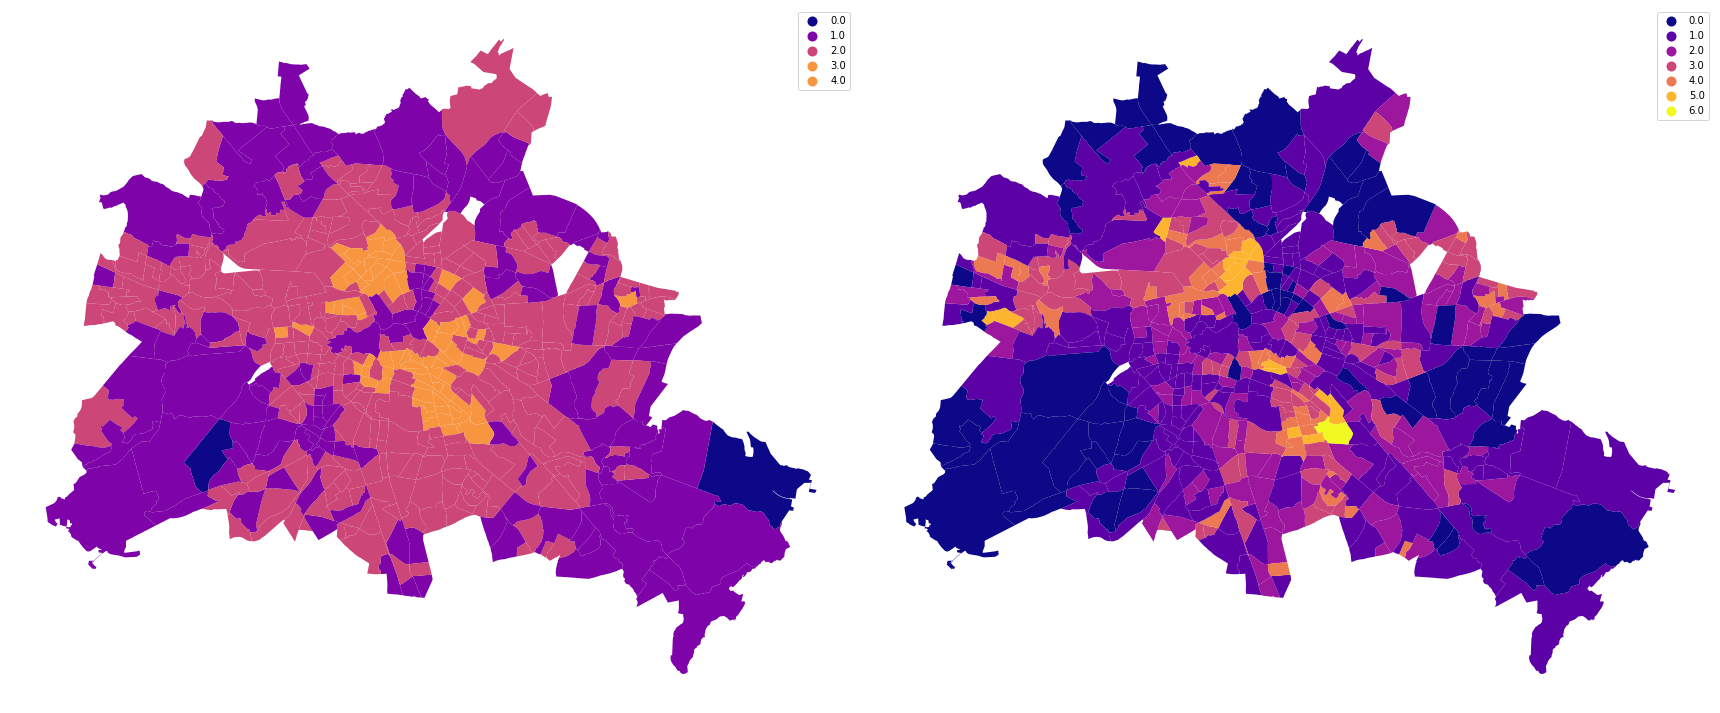

In [332]:
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 24))

ax = axs[0]
# Plot the map
s.plot(column='rounds_preds_rate',
       ax=ax,
    categorical=True,
        linewidth=0,
        cmap=cmap,
        legend=True,         )
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
#ax.set_title(col)    
    
ax = axs[1]
# Plot the map
selected.plot(
    column='rounds_ch_rate',
    ax=ax,
    categorical=True,
    linewidth=0,
    cmap="plasma",
    legend=True
)
# Remove axis clutter
ax.set_axis_off()
# Set the axis title to the name of variable being plotted
#ax.set_title(col)
# Display the figure
f.tight_layout()
plt.show()


In [12]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [24]:
gini(selected.mig_rate)

0.24519709674238815

In [14]:
gini(selected.child_pov)

0.3815263204524391

In [17]:
gini(selected.social_hou)

0.4793474656152343

In [310]:
s.columns

Index(['PLR_ID', 'public_tra', 'eating', 'community', 'health_car',
       'public_ser', 'education', 'universiti', 'outdoor_fa', 'outdoor_le',
       'water', 'ave_rent', 'social_hou', 'public_hou', 'rent_to_pr',
       'dyn_r_to_p', 'sales', 'dyn_sales', 'child_pov', 'air', 'bio', 'B_1940',
       'B_1941_199', 'B_1991_201', 'vegpm20', 'other_sch', 'vocat_sch',
       'primary_sc', 'Gymnasium', 'secon_sch', 'priv_schoo', 'kita',
       'stations', 'geometry', 'k5cls', 'preds', 'preds_rate',
       'rounds_preds_rate'],
      dtype='object')